# International Movie Database (IMDb)
For this project we are going to perform:


*   Web Scraping on IMDb website
*   Merging the data from IMDb with Kaggle dataset
*   Exploratory Data Analysis 
*   Modelling: Linear Regression, Regression Tree, Random Forest and Neural Network
*   Comparing each model and choosing the best one

![IMDb Image](https://miro.medium.com/max/705/1*f-bF79_zFHGXEhJvx2WPLg.jpeg)







#Importing all the necessary packages

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
import lxml
# lxml is a Python library which allows for easy handling of XML and HTML files, and can also be used for web scraping.
import re
# Regular expression or RegEx in Python is denoted as RE (REs, regexes or regex pattern) are imported through re module.
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
# Beautiful Soup is a Python library for pulling data out of HTML and XML files
from requests import get
# Requests will allow you to send HTTP/1.1 requests using Python. With it, you can add content like headers, form data, multipart files, and parameters via simple Python libraries.
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

# Web Scraping

In [83]:
# List of URLs
url1 = []
pages = np.arange(1,10000,100)
for i in pages:
  url1.append("https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=" + str(i)+"&ref_=adv_nxt")
  
# creating a web scraping function
class IMDB(object):
 
  def __init__(self, url):
    super(IMDB, self).__init__()
    page = get(url)

    self.soup = BeautifulSoup(page.content, 'lxml')


  def articleTitle(self):
    return self.soup.find("h1", class_="header").text.replace("\n","")

  def bodyContent(self):
    content = self.soup.find(id="main")
    return content.find_all("div",class_="lister-item mode-advanced")

  def movieData(self):
    movieFrame = self.bodyContent()
    movieTitle = []
    movieDate = []
    movieRunTime = []
    movieGenre = []
    movieRating = []
    movieScore = []
    movieDescription = []
    movieDirector = []
    movieStars = []
    movieVotes = []
    movieGross = []
    movieMetascore1 = []
    movieMetascore2 = []
    movieMetascore3 = []
    for movie in movieFrame:
      movieFirstLine = movie.find("h3", class_="lister-item-header")
      movieTitle.append(movieFirstLine.find("a").text)
      movieDate.append(re.sub(r"[()]","", movieFirstLine.find_all("span")[-1].text))
      try:
        movieRunTime.append(movie.find("span", class_="runtime").text[:-4])
      except: 
        movieRunTime.append(np.nan)

      try:
        movieRating.append(movie.find("strong").text)
      except:
        movieRating.append(np.nan)
      
      try:
        movieScore.append(movie.find("span",class_="metascore unfavourable").text.rstrip())
      except:
        movieScore.append(np.nan)
      
      movieDescription.append(movie.find_all("p",class_="text-muted")[-1].text.lstrip())
      movieCast = movie.find("p",class_="")

      try:
        casts = movieCast.text.replace("\n","").split('|')
        casts = [x.strip() for x in casts]
        casts = [casts[i].replace(j, "") for i,j in enumerate(["Director:", "Stars"])]
        movieDirector.append(casts[0])
        movieStars.append([x.strip() for x in casts[1].split(",")])

      except:
        casts = movieCast.text.replace("\n","").strip()
        movieDirector.append(np.nan)
        movieStars.append([x.strip() for x in casts.split(",")])

      movieNumbers = movie.find_all("span", attrs = {"name": "nv"})
      if len(movieNumbers) == 2:
        movieVotes.append(movieNumbers[0].text)
        movieGross.append(movieNumbers[1].text)
      elif len(movieNumbers) == 1:
        movieVotes.append(movieNumbers[0].text)
        movieGross.append(np.nan)
      else:
        movieVotes.append(np.nan)
        movieGross.append(np.nan)

      movieNumbers2 = movie.find_all("span", class_="metascore unfavourable")

      if len(movieNumbers2) == 1:
        movieMetascore1.append(movieNumbers2[0].text)
      else:
        movieMetascore1.append(np.nan)

      movieNumbers3 = movie.find_all("span", class_="metascore favourable")

      if len(movieNumbers3) == 1:
        movieMetascore2.append(movieNumbers3[0].text)
      else:
        movieMetascore2.append(np.nan)

      movieNumbers4 = movie.find_all("span", class_="metascore mixed")

      if len(movieNumbers4) == 1:
        movieMetascore3.append(movieNumbers4[0].text)
      else:
        movieMetascore3.append(np.nan)

    movieData = [movieTitle, movieDate, movieRunTime, movieRating, movieScore, movieDescription, movieDirector, movieStars, movieVotes,
               movieGross, movieMetascore1, movieMetascore2, movieMetascore3]
    return movieData

# Apply IMDB function on list of URLs and store data in them
data = []
for i in range(40):
  if __name__ == '__main__':
    site1=IMDB(url1[i])
    print("Subject: ",site1.articleTitle())
    data.append(site1.movieData())

  



      

Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  

# Data Pre Processing


In [84]:
# Appending data from 40 URLs
for i in range(len(data)):
  data[i] = pd.DataFrame(data[i]).transpose()

df=data[0].append([data[1],data[2],data[3],data[4],data[5],data[6],data[7],data[8],data[9],data[10],
                    data[11],data[12],data[13],data[14],data[15],data[16],data[17],data[18],data[19],data[20],
                    data[21],data[22],data[23],data[24],data[25],data[26],data[27],data[28],data[29],data[30],
                    data[31],data[32],data[33],data[34],data[35],data[36],data[37],data[38],data[39]])

In [85]:
# Renaming the year column
df_new = df.rename(columns={1: 'year'})
df_new.head()

,0,year,2,3,4,5,6,7,8,9,10,11,12
0,Stranger Things,2016–,51,8.7,NaN,"When a young boy disappears, his mother, a pol...",TV-14,[51 min],"1,009,805",NaN,NaN,NaN,NaN
1,Top Gun: Maverick,2022,131,8.7,NaN,After more than thirty years of service as one...,PG-13,[131 min],"70,363",NaN,NaN,NaN,NaN
2,Better Call Saul,2015–2022,46,8.8,NaN,The trials and tribulations of criminal lawyer...,TV-MA,[46 min],"415,053",NaN,NaN,NaN,NaN
3,"Love, Death & Robots",2019–,15,8.4,NaN,A collection of animated short stories that sp...,TV-MA,[15 min],"144,451",NaN,NaN,NaN,NaN
4,Top Gun,1986,110,6.9,NaN,As students at the United States Navy's elite ...,PG,[110 min],"350,289",$179.80M,NaN,NaN,50


In [86]:
# Creating a column for metascore
df_new['meta'] = np.nan

In [87]:
# Assigning value to new column
for i in range(len(df_new)):
  if (pd.notnull(df_new.iloc[i,10])):
    df_new.iloc[i,13]=df_new.iloc[i,10]
  elif (pd.notnull(df_new.iloc[i,11])):
    df_new.iloc[i,13] = df_new.iloc[i,11]
  else:
    df_new.iloc[i,13]=df_new.iloc[i,12]

In [88]:
df_new.head()

,0,year,2,3,4,5,6,7,8,9,10,11,12,meta
0,Stranger Things,2016–,51,8.7,NaN,"When a young boy disappears, his mother, a pol...",TV-14,[51 min],"1,009,805",NaN,NaN,NaN,NaN,NaN
1,Top Gun: Maverick,2022,131,8.7,NaN,After more than thirty years of service as one...,PG-13,[131 min],"70,363",NaN,NaN,NaN,NaN,NaN
2,Better Call Saul,2015–2022,46,8.8,NaN,The trials and tribulations of criminal lawyer...,TV-MA,[46 min],"415,053",NaN,NaN,NaN,NaN,NaN
3,"Love, Death & Robots",2019–,15,8.4,NaN,A collection of animated short stories that sp...,TV-MA,[15 min],"144,451",NaN,NaN,NaN,NaN,NaN
4,Top Gun,1986,110,6.9,NaN,As students at the United States Navy's elite ...,PG,[110 min],"350,289",$179.80M,NaN,NaN,50,50


In [89]:
# Dropping metascore columns
movies_df = df_new.drop(columns=[4,10,11,12],axis=1)


In [90]:
# Renaming columns
movies_df.columns = ['title','year','duration','rating','description','director','actors','votes','budget','metascore']

In [91]:
# Subsetting data to movies subset
movies = movies_df[~movies_df['year'].str.contains('-')]
movies.head()

,title,year,duration,rating,description,director,actors,votes,budget,metascore
0,Stranger Things,2016–,51,8.7,"When a young boy disappears, his mother, a pol...",TV-14,[51 min],"1,009,805",NaN,NaN
1,Top Gun: Maverick,2022,131,8.7,After more than thirty years of service as one...,PG-13,[131 min],"70,363",NaN,NaN
2,Better Call Saul,2015–2022,46,8.8,The trials and tribulations of criminal lawyer...,TV-MA,[46 min],"415,053",NaN,NaN
3,"Love, Death & Robots",2019–,15,8.4,A collection of animated short stories that sp...,TV-MA,[15 min],"144,451",NaN,NaN
4,Top Gun,1986,110,6.9,As students at the United States Navy's elite ...,PG,[110 min],"350,289",$179.80M,50


In [92]:
# Getting last 4 numbers of your
for i in range(len(movies)):
  movies.iloc[i,1]=movies.iloc[i,1][-4:]


In [93]:
# Importing second dataset
movies_kaggle = pd.read_csv('/content/drive/MyDrive/PythonProjectsSimplilearn/IMDbDataset/movies_metadata.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [94]:
movies_kaggle.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [95]:
movies_kaggle.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [96]:
# Dropping cloumns that will not be used
movies_kaggle=movies_kaggle.drop(columns=['belongs_to_collection','budget','homepage','id','imdb_id','original_title','overview','runtime',
                                          'spoken_languages','status','tagline','video','vote_average','vote_count'],axis=1);

In [97]:
# Removing duplicates
movies_kaggle=movies_kaggle.drop_duplicates(subset="title",keep=False)

In [98]:
# Getting last 4 numbers of the year
for i in range(len(movies_kaggle)):
  if (pd.notnull(movies_kaggle.iloc[i,7])):
    movies_kaggle.iloc[i,7]=movies_kaggle.iloc[i,7][0:4]

In [99]:
# Joining the 2 dataset
movies_ratings = pd.merge(movies,movies_kaggle,left_on=['title','year'],right_on=['title','release_date'])

In [100]:
movies_ratings.head()

,title,year,duration,rating,description,director,actors,votes,budget,metascore,adult,genres,original_language,popularity,poster_path,production_companies,production_countries,release_date,revenue
0,Top Gun,1986,110,6.9,As students at the United States Navy's elite ...,PG,[110 min],"350,289",$179.80M,50,False,"[{'id': 28, 'name': 'Action'}, {'id': 10749, '...",en,20.301019,/orGXnBKfT41LxZhitLkXhqUfJJW.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1986,356830601.0
1,The Godfather,1972,175,9.2,The aging patriarch of an organized crime dyna...,R,[175 min],"1,788,224",$134.97M,NaN,False,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",en,41.109264,/rPdtLWNsZmAtoZl9PK7S2wE3qiS.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1972,245066411.0
2,The Rum Diary,2011,119,6.1,American journalist Paul Kemp takes on a freel...,R,[119 min],"103,981",$13.10M,56,False,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",en,10.110504,/hYtMOXjSur5QccB4pZYWbKHMDor.jpg,"[{'name': 'FilmEngine', 'id': 816}, {'name': '...","[{'iso_3166_1': 'US', 'name': 'United States o...",2011,24000000.0
3,The Lincoln Lawyer,2011,118,7.3,A lawyer defending a wealthy man begins to bel...,R,[118 min],"233,604",$58.01M,NaN,False,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",en,6.807442,/bTXtxFUyqQ6T9FRa3ajSdMtwnAj.jpg,"[{'name': 'Lakeshore Entertainment', 'id': 126...","[{'iso_3166_1': 'US', 'name': 'United States o...",2011,85412898.0
4,Pirates of the Caribbean: The Curse of the Bla...,2003,143,8.0,Blacksmith Will Turner teams up with eccentric...,PG-13,[143 min],"1,091,047",$305.41M,NaN,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,47.326665,/tkt9xR1kNX5R9rCebASKck44si2.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2003,655011224.0


In [101]:
len(movies_ratings)

1491

In [102]:
movies_ratings.columns

Index(['title', 'year', 'duration', 'rating', 'description', 'director',
       'actors', 'votes', 'budget', 'metascore', 'adult', 'genres',
       'original_language', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue'],
      dtype='object')

In [103]:
movies_ratings=movies_ratings.drop(columns='release_date',axis=1)

In [104]:
# Checking  null values
movies_ratings.isnull().sum()

title                     0
year                      0
duration                  0
rating                    0
description               0
director                  0
actors                    0
votes                     0
budget                   69
metascore               987
adult                     0
genres                    0
original_language         0
popularity                0
poster_path               0
production_companies      0
production_countries      0
revenue                   0
dtype: int64

In [105]:
movies_ratings["duration"] = movies_ratings["duration"].astype(str).astype(float)
movies_ratings["rating"] = movies_ratings["rating"].astype(str).astype(float)
# movies_ratings["votes"] = movies_ratings["votes"].astype(str).astype(float)
# movies_ratings["budget"] = movies_ratings["budget"].astype(str)
movies_ratings["metascore"] = movies_ratings["metascore"].astype(str).astype(float)
movies_ratings["popularity"] = movies_ratings["popularity"].astype(str).astype(float)
movies_ratings["revenue"] = movies_ratings["revenue"].astype(str).astype(float)

In [106]:
# Cleaning the budget
for i in range(len(movies_ratings)):
  if (pd.notnull(movies_ratings.iloc[i,8])):
    movies_ratings.iloc[i,8] = movies_ratings.iloc[i,8].strip('$').strip('M')
    

In [107]:
movies_ratings["budget"] = movies_ratings["budget"].astype(str).astype(float)

In [108]:
movies_ratings["budget"] = movies_ratings['budget']*1000000

In [109]:
movies_ratings["title"] = movies_ratings["title"].astype('str')
movies_ratings["year"] = movies_ratings["year"].astype('str').astype('category')
movies_ratings["director"] = movies_ratings["director"].astype('str').astype('category')
movies_ratings["adult"] = movies_ratings["adult"].astype('str').astype('category')
movies_ratings["original_language"] = movies_ratings["original_language"].astype('str').astype('category')

In [110]:
# Dropping null values
movies_ratings = movies_ratings.dropna(how='any',axis=0)

# Exploratory Data Analysis

In [111]:
movies_ratings.describe()

,duration,rating,budget,metascore,popularity,revenue
count,496.000000,496.000000,4.960000e+02,496.000000,496.000000,4.960000e+02
mean,113.629032,6.577016,8.536762e+07,50.790323,13.690211,1.934108e+08
std,18.297747,0.655201,8.027488e+07,5.873789,25.089837,2.210584e+08
min,81.000000,3.400000,2.000000e+04,40.000000,0.393865,0.000000e+00
25%,100.000000,6.200000,3.154250e+07,46.000000,8.576823,4.390872e+07
50%,110.000000,6.600000,6.115500e+07,51.000000,11.073994,1.229171e+08
75%,125.000000,7.000000,1.170825e+08,56.000000,14.417171,2.589993e+08
max,191.000000,8.600000,6.522700e+08,60.000000,547.488298,1.513529e+09


## Correlation Matrix

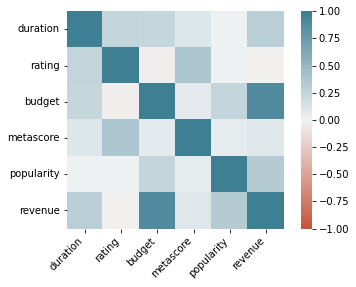

In [112]:
# Correlation matrix
corr = movies_ratings.corr()
ax = sns.heatmap(
    corr,vmin=-1, vmax=1, center=0
    ,cmap=sns.diverging_palette(20,220,n=200),square=True);
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right'
);

## Boxplot

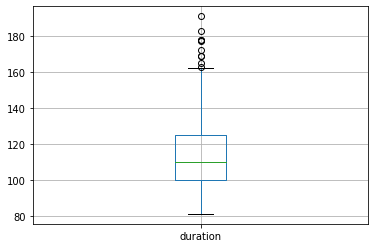

In [113]:
movies_ratings.boxplot(column=['duration'])

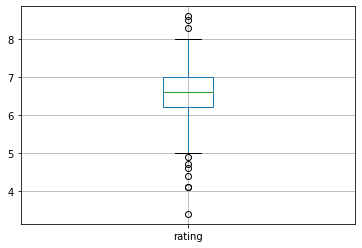

In [114]:
movies_ratings.boxplot(column=['rating'])

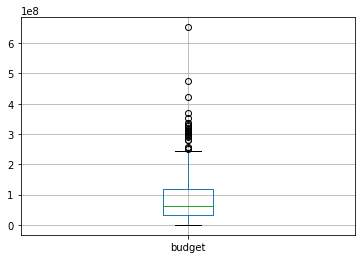

In [115]:
movies_ratings.boxplot(column=['budget'])

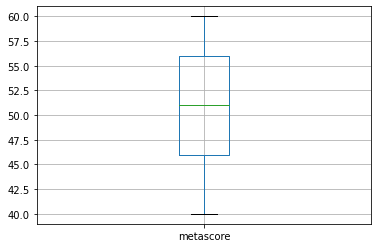

In [116]:
movies_ratings.boxplot(column=['metascore'])

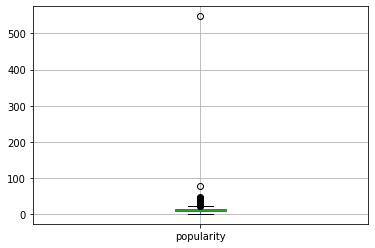

In [117]:
movies_ratings.boxplot(column=['popularity'])

In [118]:
# we will remove outliers from dataset
movies_ratings= movies_ratings[movies_ratings.popularity < 300]

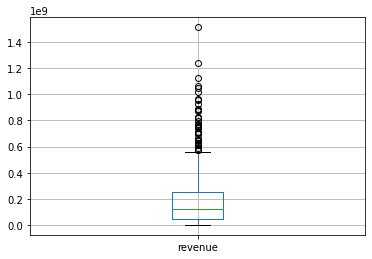

In [119]:
movies_ratings.boxplot(column=['revenue'])

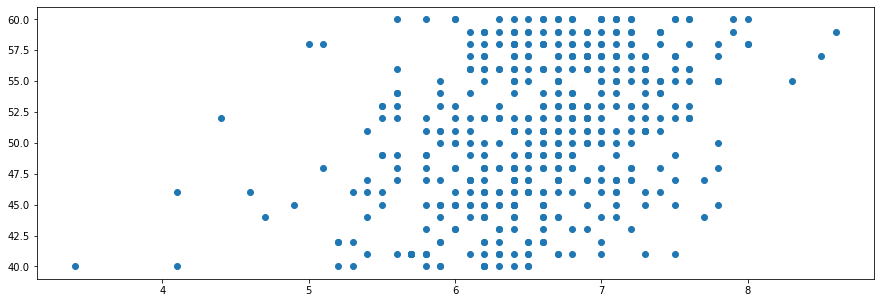

In [120]:
# Rating vs Metascore
fig, ax = plt.subplots(1, figsize=(15,5))
ax.scatter('rating','metascore',data=movies_ratings)

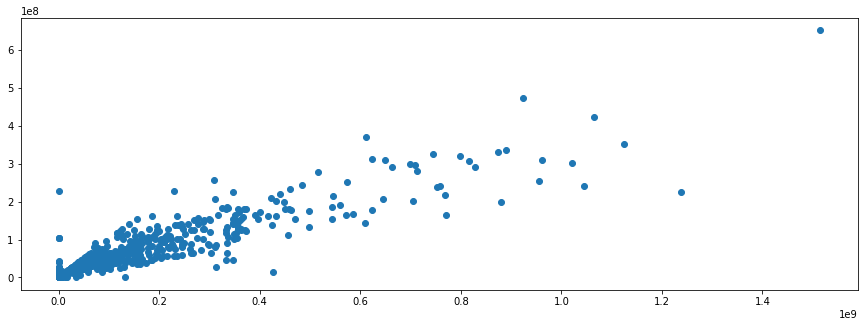

In [121]:
# Revenue vs Budget
fig, ax=plt.subplots(1, figsize=(15,5))
ax.scatter('revenue','budget',data=movies_ratings)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Ratings')

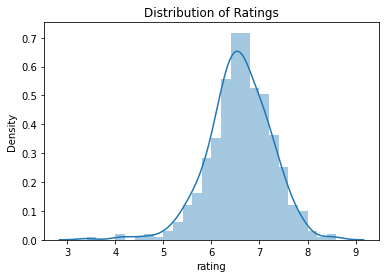

In [122]:
# Distribution of Ratings
sns.distplot(movies_ratings['rating']).set_title('Distribution of Ratings')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of metascore')

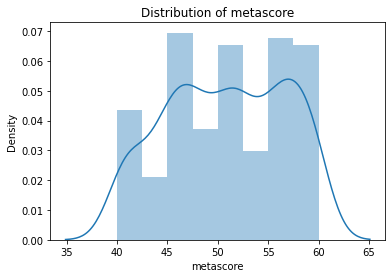

In [123]:
# Distribution of Metascore
sns.distplot(movies_ratings['metascore']).set_title('Distribution of metascore')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Duration')

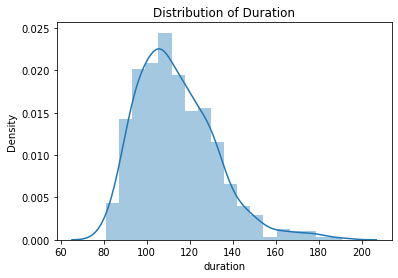

In [124]:
# Distribution of Duration
sns.distplot(movies_ratings['duration']).set_title('Distribution of Duration')

Text(0.5, 1.0, 'Distribution of Budget')

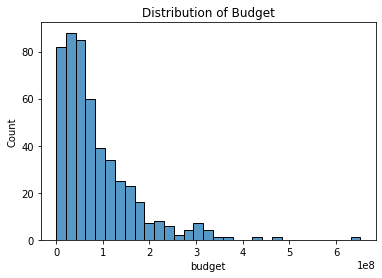

In [125]:
# Distribution of budget
sns.histplot(movies_ratings['budget']).set_title('Distribution of Budget')

Text(0.5, 1.0, 'Distribution of revenue')

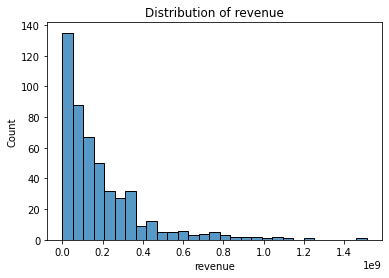

In [126]:
# Distribution of Revenue
sns.histplot(movies_ratings['revenue']).set_title('Distribution of revenue')

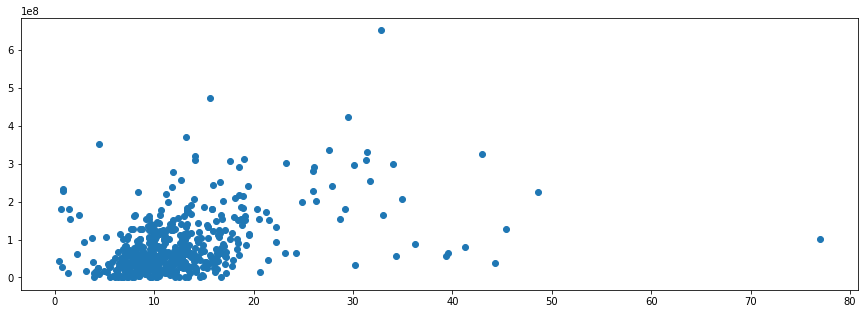

In [127]:
# Scatter plot of popularity and budget
fig, ax=plt.subplots(1, figsize=(15,5))
ax.scatter('popularity','budget',data=movies_ratings)

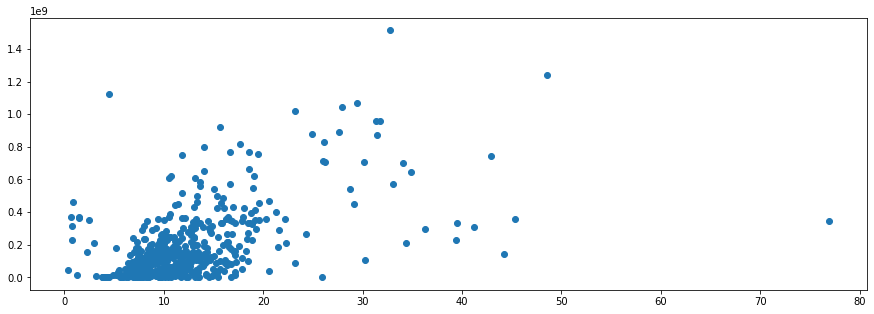

In [128]:
# Scatter plot of popularity and revenue
fig, ax=plt.subplots(1, figsize=(15,5))
ax.scatter('popularity','revenue',data=movies_ratings)

<BarContainer object of 18 artists>

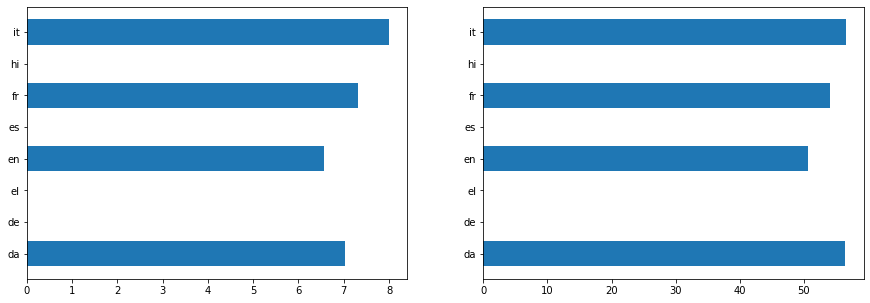

In [129]:
fig, ax=plt.subplots(1,2, figsize = (15,5))
ax[0].barh('original_language','rating',data=movies_ratings.groupby('original_language',as_index=False).mean())
ax[1].barh('original_language','metascore',data=movies_ratings.groupby('original_language',as_index=False).mean())


In [130]:
movies_ratings.groupby('year',as_index=False).mean()

,year,duration,rating,budget,metascore,popularity,revenue
0,1939,NaN,NaN,NaN,NaN,NaN,NaN
1,1941,NaN,NaN,NaN,NaN,NaN,NaN
2,1942,NaN,NaN,NaN,NaN,NaN,NaN
3,1945,NaN,NaN,NaN,NaN,NaN,NaN
4,1946,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
69,2013,113.000000,6.614815,6.708556e+07,49.407407,12.377853,1.424225e+08
70,2014,115.400000,6.560000,8.654200e+07,49.050000,19.798173,2.480037e+08
71,2015,121.800000,6.333333,1.115593e+08,50.533333,19.967811,3.175682e+08
72,2016,114.583333,6.404167,8.897542e+07,50.375000,19.628172,2.540122e+08


In [131]:
movies_ratings.groupby('original_language',as_index=False).mean()

,original_language,duration,rating,budget,metascore,popularity,revenue
0,ca,NaN,NaN,NaN,NaN,NaN,NaN
1,cn,NaN,NaN,NaN,NaN,NaN,NaN
2,da,136.666667,7.033333,7.533333e+05,56.333333,9.057453,6.566623e+06
3,de,NaN,NaN,NaN,NaN,NaN,NaN
4,el,NaN,NaN,NaN,NaN,NaN,NaN
5,en,113.549383,6.562551,8.618990e+07,50.695473,12.595289,1.935465e+08
6,es,NaN,NaN,NaN,NaN,NaN,NaN
7,fr,112.500000,7.325000,1.367250e+07,54.000000,11.372039,1.155844e+08
8,hi,NaN,NaN,NaN,NaN,NaN,NaN
9,it,112.000000,8.000000,3.052500e+07,56.500000,24.442741,1.147000e+08


# Modeling

In [132]:
# Encoding year and original language
c = movies_ratings[['year','original_language']]
encoder = OneHotEncoder(sparse=False)
encoder.fit(c)
c2=encoder.transform(c)
df = pd.DataFrame(c2, columns=encoder.get_feature_names())
df
movies_ratings2=pd.concat([movies_ratings.drop(['year','original_language'],axis=1),df],axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [133]:
# Dropping variables which will not be used
movies_ratings=movies_ratings2.drop(['title','description','director','actors','votes','adult','genres','poster_path','production_companies','production_countries'],axis=1)

In [134]:
# Dropping null values
movies_ratings=movies_ratings.dropna(how='any',axis=0)

In [135]:
# Splitting the data into training and testing (80 - 20)
y = movies_ratings.rating
x= movies_ratings.drop('rating',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


# Linear Regression

In [136]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [137]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
duration,8.190371e-03
budget,-1.410092e-09
metascore,3.334484e-02
popularity,3.851395e-03
revenue,-3.483669e-10
x0_1970,3.579108e-08
x0_1971,-1.523536e-08
x0_1972,3.188857e-09
x0_1973,2.722624e-09
x0_1976,3.281297e-09


In [138]:
# Prediction
y_pred = regressor.predict(x_test)

In [139]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(20)
df1

,Actual,Predicted
189,7.1,6.764286
416,6.7,6.709752
41,7.3,6.727547
217,5.9,6.843220
60,6.6,6.389243
20,7.5,7.024758
387,7.2,6.281361
450,6.2,6.606201
438,7.6,6.783442
376,6.8,7.476733


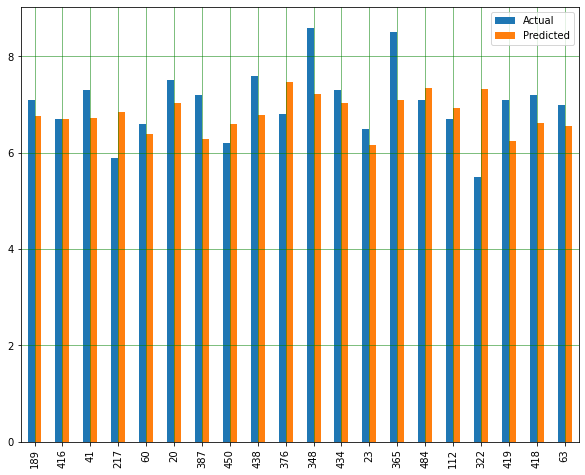

In [140]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='yellow')
plt.show()

In [141]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Mean Absolute Error: 0.637202327022861
Mean Squared Error: 0.6277150209302114
Root Mean Squared Error: 0.7922846842708822


# Regression Tree

In [142]:
regr_2 = DecisionTreeRegressor(max_depth=5)
reg_tree=regr_2.fit(x_train,y_train)

In [143]:
# Predict
y_2=regr_2.predict(x_test)
y_2

array([7.4375    , 6.47142857, 6.88974359, 6.45      , 6.99166667,
       7.9       , 6.        , 6.47142857, 6.88974359, 6.45      ,
       7.575     , 6.45      , 6.88974359, 6.99166667, 6.99166667,
       6.99166667, 6.45      , 6.47142857, 5.6       , 6.88974359,
       6.47142857, 6.47142857, 6.88974359, 7.5       , 6.99166667,
       6.99166667, 6.88974359, 6.        , 7.5       ])

In [144]:
df2 = pd.DataFrame({'Actual': y_test,'Predicted': y_2})
df3 = df.head(20)
df3

,Actual,Predicted
189,7.1,6.764286
416,6.7,6.709752
41,7.3,6.727547
217,5.9,6.843220
60,6.6,6.389243
20,7.5,7.024758
387,7.2,6.281361
450,6.2,6.606201
438,7.6,6.783442
376,6.8,7.476733


In [145]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_2)))


Mean Absolute Error: 0.7292677150435769
Mean Squared Error: 0.8174128299427299
Root Mean Squared Error: 0.9041088595643392


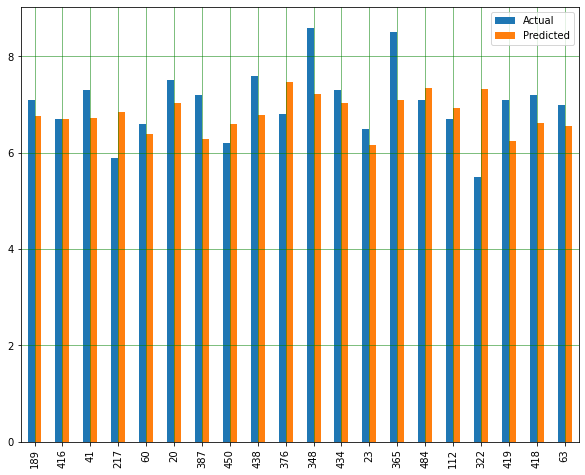

In [146]:
df3.plot(kind='bar',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='yellow')
plt.show()

# Random Forest

In [147]:
model = RandomForestRegressor()
model.fit(x_train,y_train)
predicted_ratings = model.predict(x_test)

In [148]:
df7 = pd.DataFrame({'Actual':y_test, 'Predicted':predicted_ratings})
df8 = df3.head(20)
df8

,Actual,Predicted
189,7.1,6.764286
416,6.7,6.709752
41,7.3,6.727547
217,5.9,6.843220
60,6.6,6.389243
20,7.5,7.024758
387,7.2,6.281361
450,6.2,6.606201
438,7.6,6.783442
376,6.8,7.476733


In [149]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted_ratings))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted_ratings))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,predicted_ratings)))


Mean Absolute Error: 0.5853793103448278
Mean Squared Error: 0.5707287586206905
Root Mean Squared Error: 0.7554659215482129


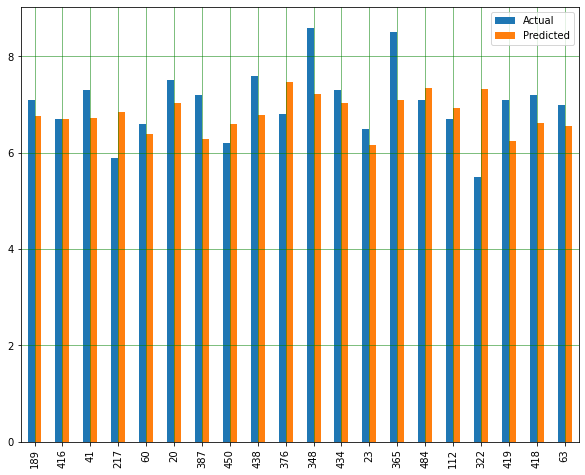

In [150]:
df8.plot(kind='bar',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='yellow')
plt.show()

# Conclusion

Using Mean Squared Error for different models to predict the best one 

**Order of medel fit:**

Random Forest(0.566)

Linear Regression(0.6277)

Regression Tree(0.85077)



